# How to simulate

The unique feature of structural models compared to other econometric models is the ability to provide counterfactuals. There exist three different routines to simulate counterfactuals with ``respy``. The methods differ in the way they depend on data.

1. *n-step-ahead simulation without data*: The first observation of an individual is sampled from the initial conditions, i.e., the distribution of observed variables or initial experiences, etc. in the first period. Then, the individuals are guided for $n$ periods by the decision rules from the solution of the model.

2. *n-step-ahead simulation with first observations*: Instead of sampling individuals from the initial conditions, take the first observation of each individual in the data. Then, proceed as in 1..

3. *one-step-ahead simulation*: Take the complete data and find for each observation the corresponding outcomes, e.g, choices and wages, using the decision rules from the model solution.

In this notebook, you will learn how to use any of the three methods and what their purpose is. We take the basic model from Keane and Wolpin (1997) and their original data. We start with importing the model and data.

In [1]:
%matplotlib inline

import respy as rp

params, options, df = rp.get_example_model("kw_97_basic")

## 1. n-step-ahead simulation without data

The first exercise is an *n-step-ahead simulation without data*. This method and the following *n-step-ahead simulation with first observations* are the cornerstone for providing counterfactual


To reduce the complexity of the model, we reduce the model horizon to 12 periods.

In [2]:
options["n_periods"] = 12

In [3]:
simulate = rp.get_simulate_func(params, options)

In [4]:
df_1 = simulate(params)

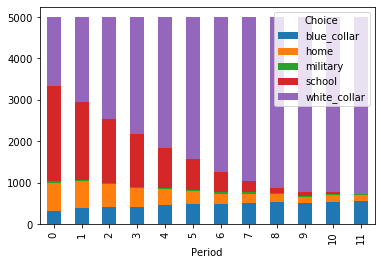

In [5]:
df_1.groupby("Period").Choice.value_counts().unstack().plot.bar(stacked=True)

## 2. n-step-ahead simulation with first observations

In [6]:
df_ = df.query("Period == 0")

In [7]:
simulate = rp.get_simulate_func(params, options, df_)

In [8]:
df_2 = simulate(params)

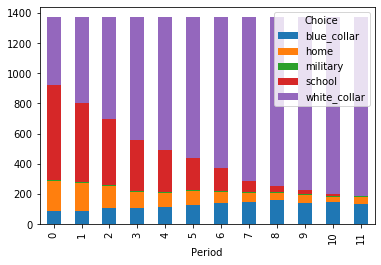

In [9]:
df_2.groupby("Period").Choice.value_counts().unstack().plot.bar(stacked=True)

## 3. one-step-ahead simulation

In [10]:
simulate = rp.get_simulate_func(params, options, df)

In [11]:
df_3 = simulate(params)

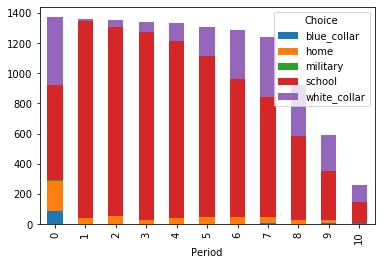

In [12]:
df_3.groupby("Period").Choice.value_counts().unstack().plot.bar(stacked=True)